# Project - Finding the Best Markets for Advertisement

**Background and Aim**

As a marketing analyst working for an an e-learning company that offers courses on programming we are interested in finding markets for advertising. Most of our courses are on "web" and "mobile development", but we also cover many other domains, like "data science", "game development", etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

**Dataset**

Conducting a physical survey being costly, we will initially explore available datasets. Presently, we wil work with data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in their [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', keep_default_na = True, low_memory = False)
print(survey.info())
print(survey.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB
None
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million

### Generate a Frequency Table

Below we generate a frequency table in the form of a dictionary, in order to assess the major categories for which the respondents to the survey expressed interest. 

In [3]:
counts = survey.JobRoleInterest.value_counts(normalize = True)*100

# Coders have given multiple options in the form of strings; we have to split the string

counts_split = counts.index.str.split(',')

# Generate frequency table in the form of a dictionary 

freq_table = {}
for row in counts_split:
    for i in range(len(row)):
        role = row[i] 
    
        if role in freq_table:
            freq_table[role] += 1
        else:
            freq_table[role] = 1

print(freq_table)

len(freq_table)
        
                 
    

{'Full-Stack Web Developer': 460, '  Front-End Web Developer': 416, '  Data Scientist': 266, 'Back-End Web Developer': 382, '  Mobile Developer': 306, 'Game Developer': 256, 'Information Security': 209, '   Front-End Web Developer': 1582, ' Full-Stack Web Developer': 1761, '  Product Manager': 141, 'Data Engineer': 209, '  User Experience Designer': 218, ' Back-End Web Developer': 1509, '  DevOps / SysAdmin': 162, '   Mobile Developer': 1347, '   User Experience Designer': 907, '   Data Scientist': 974, ' Data Engineer': 859, ' Game Developer': 948, '  Quality Assurance Engineer': 86, ' Information Security': 893, '   DevOps / SysAdmin': 643, '   Product Manager': 543, 'Software Engineer': 1, 'Software Developer': 1, '   Quality Assurance Engineer': 375, 'Unsure': 1, 'Not sure': 1, 'Artificial Intelligence': 1, 'undecided': 1, 'Not sure yet': 1, ' data analyst': 2, ' plc': 1, 'Network': 1, ' Teacher': 1, ' software engineer': 1, ' Bioinformatics/science ': 1, ' security expert': 1, ' B

236

The above generated dictionary is a long list of categories (236), and has many repetitive values due to inconsistent formatting and inconsistent use of spacing by respondents.
Below, we concrentrate on respondents who included `'web developer'` and `'mobile developer'` as a future role that they were interested in, using regex. 

In [4]:
freq_series = pd.Series(freq_table, index = freq_table.keys()) # uses keys() to get dictionary keys as index of series
web_mobile = freq_series[freq_series.index.str.contains('[wW]eb [dD]evel*|[mM]obile [dD]evel*')] # caters for development and developer

print('sum_web_mobile: ', sum(web_mobile), '\n')
print(web_mobile)

sum_web_mobile:  7769 

Full-Stack Web Developer                           460
  Front-End Web Developer                          416
Back-End Web Developer                             382
  Mobile Developer                                 306
   Front-End Web Developer                        1582
 Full-Stack Web Developer                         1761
 Back-End Web Developer                           1509
   Mobile Developer                               1347
 Software Developer or Front-End Web Developer       1
 Mobile Development                                  1
 Front End Web Development                           1
Web development                                      1
Web developer                                        1
 mobile developer                                    1
dtype: int64


In [5]:
# Checking null entries
print(survey.JobRoleInterest.notnull().sum())
print(survey.JobRoleInterest.isnull().sum())

6992
11183


We can see above the use of inconsistent spacing and non-uniform formatting due to which the data is segmented. However, it is clear that there are a total of 7769 expressions of some interest in web and/ or mobile development under 14 categories. 6992 respondents have answered this question, but due to multiple options exercised by them the interest for web and mobile development is almost uniform. For instance, check following entries which contain the string 'web developer' multiple times. 

In [6]:
print(survey.JobRoleInterest.head(5))

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object


Similarly, we can identify the categories which are other than web or mobile development.

In [7]:
not_web_mobile = freq_series[freq_series.index.str.contains('[wW]eb [dD]evel*|[mM]obile [dD]evel*') == False]
print('sum_not_web_mobile: ', sum(not_web_mobile), '\n')
print(not_web_mobile) # Remove all single digit entries

sum_not_web_mobile:  7911 

  Data Scientist        266
Game Developer          256
Information Security    209
  Product Manager       141
Data Engineer           209
                       ... 
Education                 1
Pharmacy tech             1
Project manager           1
Financial Services        1
Software Engineering      1
Length: 222, dtype: int64


7911 expressions of intersts are there in 222 `not_web_mobile` categories. Most of them have frequencies in single digit though implying that these are not very popular choices. So below, we have removed the single digit categories from both criteria i.e. `web_mobile` as well as `not_web_mobile` to focus on major categories only.  

In [8]:
# Removing single digit categories
web_mobile_dd = web_mobile[web_mobile > 9].sort_values(ascending = False) ## dd denotes double digit

print('sum_web_mobile_dd: ', sum(web_mobile_dd), '\n')
print(web_mobile_dd) 

sum_web_mobile_dd:  7763 

 Full-Stack Web Developer     1761
   Front-End Web Developer    1582
 Back-End Web Developer       1509
   Mobile Developer           1347
Full-Stack Web Developer       460
  Front-End Web Developer      416
Back-End Web Developer         382
  Mobile Developer             306
dtype: int64


In [9]:
# Removing single digit categories
not_web_mobile_dd = not_web_mobile[not_web_mobile > 9].sort_values(ascending = False) ## dd denotes double digit

print('sum_not_web_mobile_dd: ', sum(not_web_mobile_dd), '\n')
print(not_web_mobile_dd) 

sum_not_web_mobile_dd:  7689 

   Data Scientist                974
 Game Developer                  948
   User Experience Designer      907
 Information Security            893
 Data Engineer                   859
   DevOps / SysAdmin             643
   Product Manager               543
   Quality Assurance Engineer    375
  Data Scientist                 266
Game Developer                   256
  User Experience Designer       218
Data Engineer                    209
Information Security             209
  DevOps / SysAdmin              162
  Product Manager                141
  Quality Assurance Engineer      86
dtype: int64


We have removed all single digit categories. After this we are reduced to only 16 categories instead of the original 222. categories. There are some duplications in these categories as well, for instance, `Data Scientist`, `Data Engineer` and `Game Developer` are repeated due to formatting inconsistencies. However, we get a broad idea of popular categories from `not_web_mobile` criteria.
In many cases, the respondents have stacked them together with `web_mobile` categories while answering the question as shown below. 

In [10]:
print(survey.JobRoleInterest.tail(5))

18170                                                  NaN
18171      DevOps / SysAdmin,   Mobile Developer,   Pro...
18172                                                  NaN
18173                                                  NaN
18174    Back-End Web Developer, Data Engineer,   Data ...
Name: JobRoleInterest, dtype: object


### Plotting the Data

We will now, plot the data for `web_mobile` and `not_web_mobile` as a bar chart for each criteria.

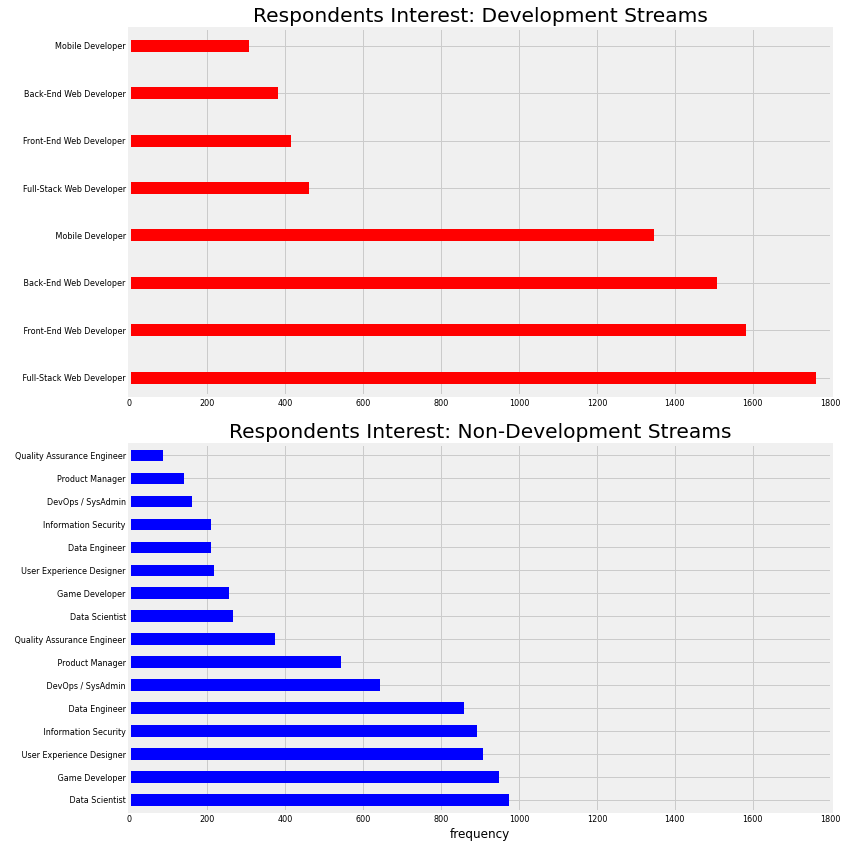

In [11]:
fig = plt.figure(figsize=(12, 12))
plt.style.use('fivethirtyeight')

plt.subplot(2,1,1)
web_mobile_dd.plot.barh(color = 'red', title = 'Respondents Interest: Development Streams', fontsize = 8, width = 0.25)


plt.xlim(0, 1800)

plt.subplot(2,1,2)
not_web_mobile_dd.plot.barh(color = 'blue', title = 'Respondents Interest: Non-Development Streams', fontsize = 8)
plt.xlabel('frequency', fontsize = 12)

plt.xlim(0, 1800)
plt.tight_layout() 
plt.show()

Although the data above can be further refined by combining similar columns, but nonethelss, it is quite clear even from this picture that the respondents had expressed interest not only in web and mobile development but also in some major non-development categories such as data science, game development and data engineering. 

### Locations and Densities of New Coders

We will now focus on respondents who had answered the question for the `JobRoleInterest` column and make absolute and normalized frequency tables based on their current locations i.e. the column `CountryLive` to generate the density of new coders by their countries of residence.

In [12]:
survey_notnull = survey[survey.JobRoleInterest.notnull()]

# generate absolute frquency table by location
abs_freq = survey_notnull.CountryLive.value_counts(ascending = False)

# generate relative frquency table by location
rel_freq = survey_notnull.CountryLive.value_counts(normalize = True, ascending = False)*100

# Combine data in a new dataframe

survey_bylocation = pd.DataFrame({'Frequency': abs_freq, 'Percentage': rel_freq}, index = abs_freq.index)

survey_bylocation

,Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


United States is the biggest market followed by a wide margin by India, UK and Canada. To illustrate the distribution, below, we plot a bar graph depicting relative frequencies country wise only for countries with at least 1% respondents. 

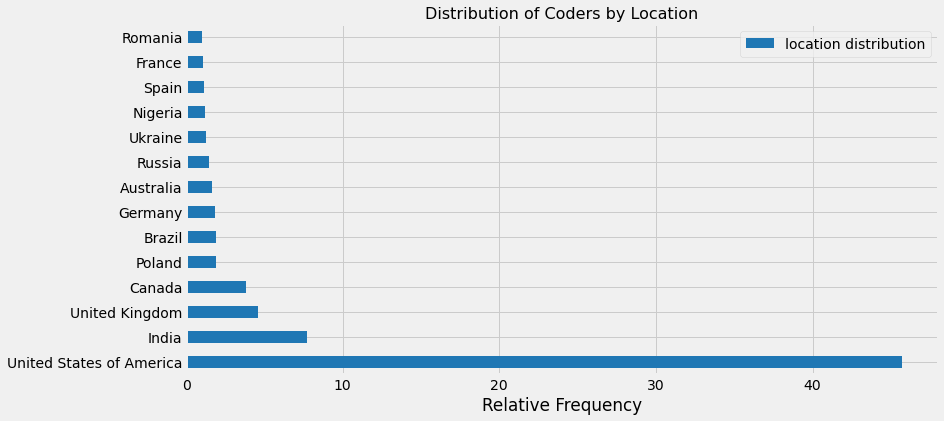

In [13]:
fig = plt.figure(figsize=(12, 6))
from numpy import arange
plt.style.use('fivethirtyeight')
survey_bylocation[survey_bylocation['Percentage'] >= 1]['Percentage'].plot.barh(label = 'location distribution', legend = True, colormap = 'tab10')

# lines indicating mean, and standard deviation

plt.legend()
plt.xlabel('Relative Frequency')
plt.title("Distribution of Coders by Location", fontsize = 16)
plt.show()

### Spending Money for Learning

An important factor to consider while identifying markets for our products is the financial capacity and preferences of the new coders i.e. how much money they are willing to spend on learning. 

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of usd 59 per month, and for this reason we're interested in finding out how much money each student spends per month on learning.

We will also narrow down our analysis to only four top countries: the US, India, the United Kingdom, and Canada being the most representative of typical digital learners. We will find the mean of money spent per month by new coders in these four countries and plot a bar chart for comparison.

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64


C:\Anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-14-9a0b4ce6bda7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_notnull['money_per_month'] = survey_notnull.MoneyForLearning / survey_notnull.MonthsProgramming


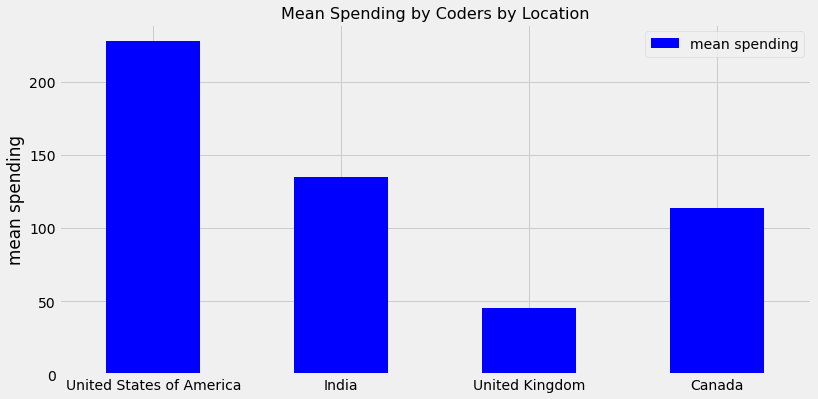

In [14]:
# Create a new column "money_per_month" based on past spending and the duration spent coding till the time of survey
# Analysis will be restricted to the US, India, the United Kingdon and Canada

# Replace the '0' values in the column 'MonthsProgramming' with 1
survey_notnull.MonthsProgramming.replace(0, 1, inplace = True)
# Create the column and keep only not-null values
survey_notnull['money_per_month'] = survey_notnull.MoneyForLearning / survey_notnull.MonthsProgramming

# Remove null values from 'CountryLive' column

survey_notnull = survey_notnull[survey_notnull.CountryLive.notnull()].copy()

# Groupby 'CountryLive', find mean and isolate data to four countries of concern
survey_mean_spending = survey_notnull.groupby('CountryLive')['money_per_month'].mean()[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
print(survey_mean_spending)

fig = plt.figure(figsize=(12, 6))
from numpy import arange
plt.style.use('fivethirtyeight')
survey_mean_spending.plot.bar(label = 'mean spending', legend = True, colormap = 'winter', rot = 0)

# lines indicating mean, and standard deviation

plt.legend()

plt.ylabel('mean spending')
plt.xlabel('')
plt.title("Mean Spending by Coders by Location", fontsize = 16)
plt.show()


### Checking for Extreme Outliers

Above spending profiles are somewhat inconsistent with socio-economic indicators for respective countries. We have to, therefore, check for extreme outliers which might be responsible for inflating mean values for India and deflating for USA, UK and Canada. 
For this we will plot box plots for the four countries in question. 

In [15]:
# isolate four countries of interest
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
top_four = pd.DataFrame()
for country in countries:
    country_wise = survey_notnull[survey_notnull['CountryLive'] == country]
    top_four = top_four.append(country_wise)


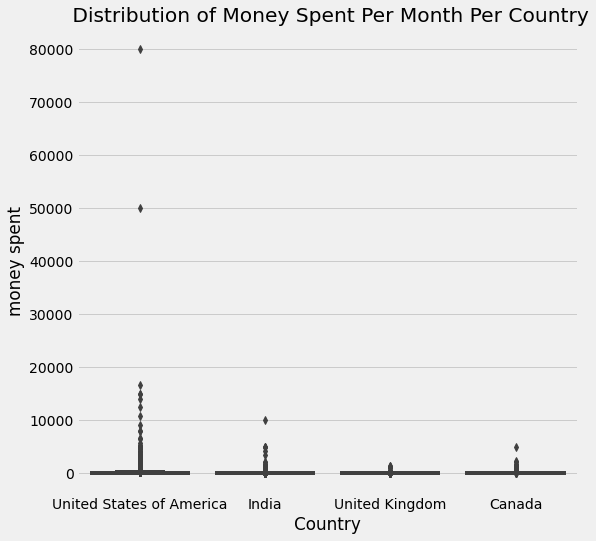

In [16]:
# Plot data for all four countries as boxplots
fig = plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = top_four)
plt.xlabel('Country')
plt.ylabel('money spent')
plt.title(' Distribution of Money Spent Per Month Per Country')
plt.show()

There ae some extreme outliers far above the mean in terms of money spent. We start rationalizing by removing outliers who spent above usd 10,000. 

CountryLive
Canada                      113.510961
India                       113.748387
United Kingdom               45.534443
United States of America    155.459187
Name: money_per_month, dtype: float64


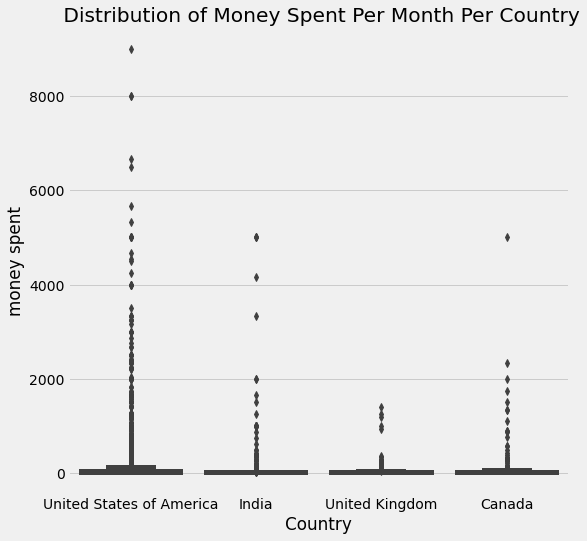

In [17]:
# Remove outliers above $10000
top_four = top_four[top_four['money_per_month'] < 10000]
print(top_four.groupby('CountryLive')['money_per_month'].mean())

# Plot data for all four countries as boxplots again
fig = plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = top_four)
plt.xlabel('Country')
plt.ylabel('money spent')
plt.title(' Distribution of Money Spent Per Month Per Country')
plt.show()

This has driven the mean down for the US and India while not affecting UK and Canada. We need to identify the high level of spending for these outliers for the US and India and a couple of outliers left for Canada. One possible reason could be attendance of an expensive bootcamp by those reporting spending over USD 2000 per month. We can identify that.

In [18]:
# Check india's coders who attended bootcamp
india_2000 = top_four[(top_four['CountryLive'] == 'India') & (top_four['money_per_month'] > 2000)]
india_2000['AttendedBootcamp']

1728     0.0
1755     0.0
7989     0.0
8126     0.0
15587    0.0
Name: AttendedBootcamp, dtype: float64

None of these outliers report having attended an expensive bootcamp. The most likely possibility is that they misinterpreted the survey question which required them to report monthly expenses on tuition other than university. Perhaps, they included the university tuition as well. 
So, we are going to remove these outliers. But first, we will check the US and Canadian outliers who spent over usd 2000.

In [19]:
# US Outliers being checked whether they attended bootcamp
us_2000 = top_four[(top_four['CountryLive'] == 'United States of America') & (top_four['money_per_month'] > 2000)]
us_2000['AttendedBootcamp']

415      1.0
441      1.0
484      1.0
718      1.0
723      1.0
1222     1.0
1334     1.0
2432     0.0
2480     0.0
3013     1.0
3144     1.0
3145     1.0
3184     1.0
3260     0.0
3304     1.0
4014     1.0
4884     0.0
5059     1.0
5769     0.0
5894     1.0
6018     0.0
6444     1.0
6528     0.0
6949     1.0
7167     1.0
7194     0.0
7505     1.0
7925     1.0
8030     0.0
8120     0.0
8202     1.0
8901     1.0
9145     1.0
9248     1.0
9559     1.0
9778     1.0
12283    1.0
12877    1.0
13051    0.0
13145    1.0
13357    1.0
13587    1.0
13815    1.0
16211    1.0
16290    0.0
16410    1.0
16616    1.0
16672    1.0
16700    0.0
16719    0.0
16971    0.0
17265    1.0
17361    1.0
Name: AttendedBootcamp, dtype: float64

Many US respondents who reported spending over usd 2000 also attended a bootcamp which explains for their high spending. Those who did not, may have misinterpreted the survey question, so we are going to remove them. 

In [20]:
# Canadian Outliers being checked whether they attended bootcamp
can_2000 = top_four[(top_four['CountryLive'] == 'Canada') & (top_four['money_per_month'] > 2000)]
can_2000['AttendedBootcamp']

6590     1.0
13659    1.0
Name: AttendedBootcamp, dtype: float64

### Bootcamps are Part of Coding Community's Culture
Canadian outliers have spent large sumns as they attended the bootcamp. Coding bootcamps are very much a part of the coding community's culture, especially in the West, so the money spent by those attending the bootcamps is justified. We are going to keep these outliers and remove Indian and US outliers who did not attend bootcamp. 

In [21]:
# Drop Indian Outliers
top_four = top_four.drop(labels = india_2000.index)


In [22]:
# Drop US Outliers who did not attend bootcamp

us_no_bootcamp = us_2000[us_2000['AttendedBootcamp'] == 0]

top_four = top_four.drop(labels = us_no_bootcamp.index)

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    137.729595
Name: money_per_month, dtype: float64


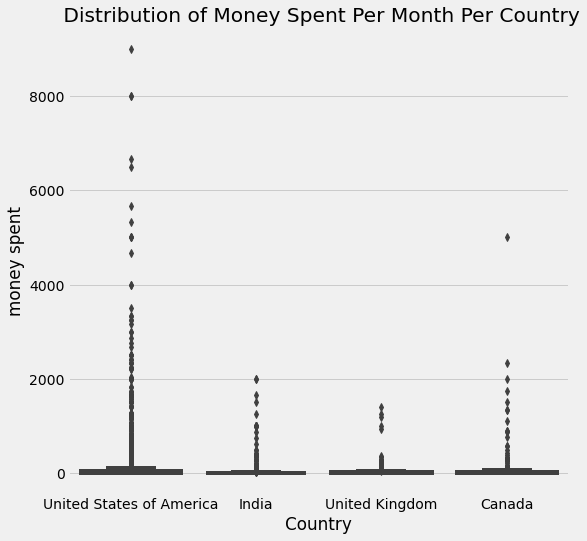

In [23]:
# Check again for mean and outliers
print(top_four.groupby('CountryLive')['money_per_month'].mean())

# Plot data for all four countries as boxplots again
fig = plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = top_four)
plt.xlabel('Country')
plt.ylabel('money spent')
plt.title(' Distribution of Money Spent Per Month Per Country')
plt.show()

### Choosing Top Two Markets

We can check the absolute and relative frequencies of individuals left in our dataset after removal of outliers to verify the size of market.

In [24]:
# Generate frequency tables
abs_market_size = top_four['CountryLive'].value_counts(ascending = False)
relative_market_size = top_four['CountryLive'].value_counts(normalize = True, ascending = False)*100
average_monthly_spending = top_four.groupby('CountryLive')['money_per_month'].mean()

# Combine metrics above into a dataframe for comparison
combined = {'market_size': abs_market_size, 'share_market': relative_market_size, 'spending_power': average_monthly_spending}
market_comparison = pd.DataFrame(data = combined)

market_comparison

,market_size,share_market,spending_power
Canada,240,6.176016,113.510961
India,457,11.760165,65.758763
United Kingdom,279,7.179619,45.534443
United States of America,2910,74.884200,137.729595


Text(0.5, 0, 'Country')

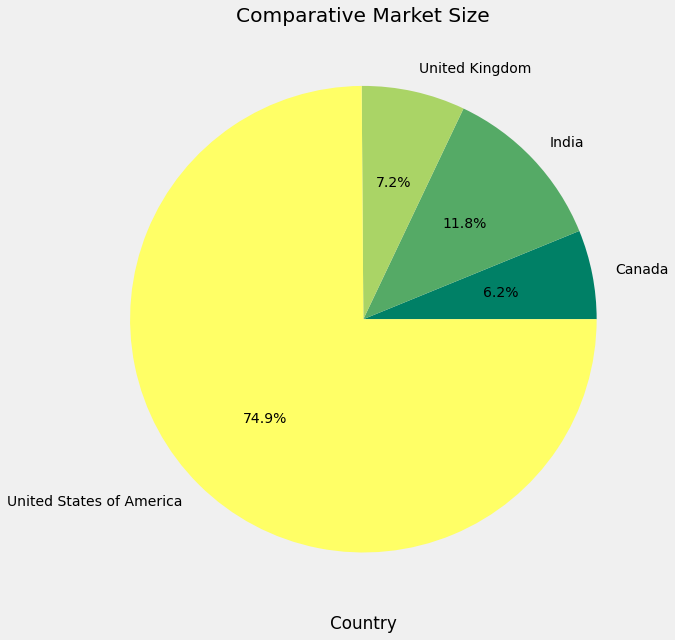

In [25]:
# Plot a pie chart to compare comparative market size
fig = plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
market_comparison.market_size.plot.pie(title = "Comparative Market Size", figsize = (10,10), colormap = "summer", autopct = '%.1f%%')
plt.ylabel('')
plt.xlabel("Country")


Text(0.5, 0, 'Country')

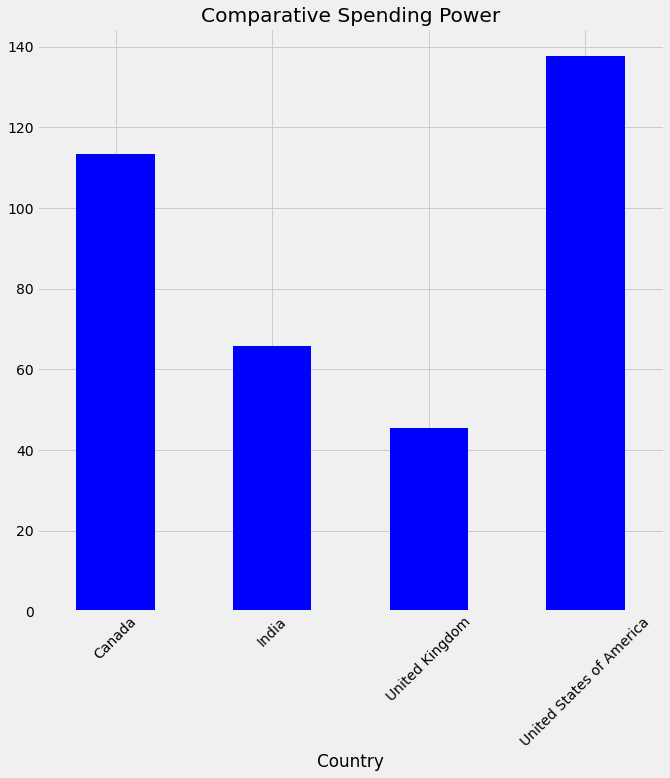

In [26]:
# Plot a bar chart to compare spending power
fig = plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
market_comparison.spending_power.plot.bar(title = "Comparative Spending Power", figsize = (10,10), colormap = "winter", rot = 45)
plt.ylabel('')

plt.xlabel("Country")

### Recommendations and Conclusions (Top Two Markets)

- From above comparisons, it can be noted that the US has the largest share of market at about 75% as well as the highest spending power at about usd 140, so **United States** is the automatic selection as the top market.
- UK is at the bottom in terms of spending at only usd 45 though nearly tied with Canada in terms of market share at between 6-7%. It is not a promising market for our products.

- We have to choose between Canada and India. Canada has a decent market share at between 6-7% and high spending power next only to the USA at usd 113%. On the other hand, India, though has a higher market share at about 11.8% does not have the required spending power which stands at only about usd 66. And though we offer products at usd 59 per month subscription, but still it is too close. 

- With a more aggressive marketing strategy, the higher spending power of Canada can be capitalized to increase the market share, whereas India is a higher risk market. So, the second recommended market is **Canada**